# **PETLOVE DATA CHALLANGE**

#### Módulos Utilizados

In [90]:
# gerais
import pandas as pd
import numpy as np

# pre-processamento
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from datetime import datetime
from datetime import date

# visualização
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')


In [91]:
dataset = pd.read_csv("https://raw.githubusercontent.com/petlove/vagas/master/data/bi-analysis/data-test-analytics.csv")

In [92]:
display(dataset.head(3))

,id,created_at,updated_at,deleted_at,name_hash,email_hash,address_hash,birth_date,status,version,city,state,neighborhood,last_date_purchase,average_ticket,items_quantity,all_revenue,all_orders,recency,marketing_source
0,8bf7960e-3b93-468b-856e-6c6c5b56f52b,2017-08-15 07:05:04.000000,2021-01-14 11:23:50.659119,NaN,312d206168a318614897e8ccac43bff9,83eb3aed9a44377df80ce876dce92c9a,8b4bfaa0cbc41a16f46da15ddcd6a907,1974-07-10 00:00:00.000000,active,2.31.7,Peixoto da Praia,AM,Aparecida 7ª Seção,2021-01-14 11:23:50.659119,151.142942,10,906.857651,6,35,crm
1,a39535b5-4647-4680-b4f6-3aed57c1f1ff,2019-12-31 21:53:34.000000,2021-01-08 11:23:50.660183,NaN,de448fcb47d0d6a873b2eef52b5ee595,72678bb35e2ac84ed373e81dd9dca28c,22f1cfa1847f38da3f3cb114dd2b9247,1940-07-06 00:00:00.000000,paused,3.30.12,Fernandes,RR,Santa Isabel,2021-01-08 11:23:50.660183,236.991790,4,236.991790,1,41,organic_search
2,dc067cd2-c021-42bd-8c0e-beb267280e66,2019-03-07 23:46:51.000000,2021-01-07 11:23:50.660990,NaN,cb09e447ddc38283373d56bb46498e6a,668f4ee9add29c7bd02c485f1b7509e3,6cb47446a086ee6483b3eb954f11467a,1963-03-18 00:00:00.000000,active,3.28.9,Lopes,RR,Estrela,2021-01-07 11:23:50.660990,211.955597,13,2331.511572,11,42,organic_search


## Análise Exploratória

####  Divisão do Dataset em Assinaturas Canceladas e Não Canceladas
---

In [93]:
df_canceled_subscriptions = dataset.dropna(subset=['deleted_at'])

In [94]:
# Máscara para o filtro de assinaturas não canceladas
mask = pd.isnull(dataset['deleted_at'])
df_active_subscriptions = dataset[mask]

####  Assinaturas por Estado
---

In [95]:
df_subscriptions_and_states = dataset[["state","status"]]
print(df_subscriptions_and_states['status'].unique())
print(df_subscriptions_and_states['state'].unique())

['active' 'paused' 'canceled']
['AM' 'RR' 'PE' 'RJ' 'MT' 'SC' 'PR' 'PB' 'AP' 'SP' 'MG' 'MA' 'AL' 'PI'
 'RO' 'AC' 'CE' 'RN' 'MS' 'PA' 'ES' 'SE' 'RS' 'DF' 'BA' 'GO' 'TO']


Text(0, 0.5, 'Amount')

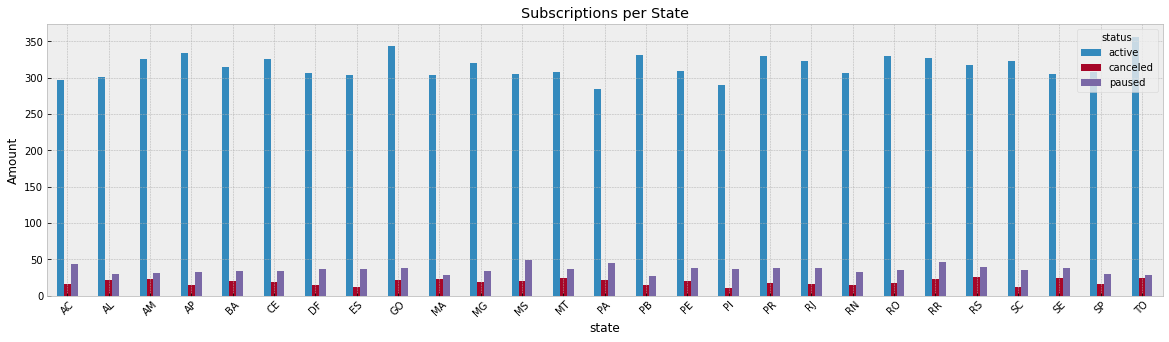

In [96]:
df_subscriptions_per_state = df_subscriptions_and_states.groupby(["state","status"]).size().unstack(1)
ax_subs_per_state = df_subscriptions_per_state.plot(kind='bar',figsize=(20,5), rot=45, title="Subscriptions per State")
ax_subs_per_state.set_ylabel("Amount")

In [97]:
plt.savefig('Subscriptions per State.png', format='png')
plt.close()

####  Intervalo de Tempo antes de uma Assinatura ser Cancelada
---

In [98]:
df_lifetime_subscription_date = pd.to_datetime(df_canceled_subscriptions["deleted_at"]) - pd.to_datetime(df_canceled_subscriptions["created_at"])
df_lifetime_subscription_days = df_lifetime_subscription_date.astype('timedelta64[D]').astype(int)

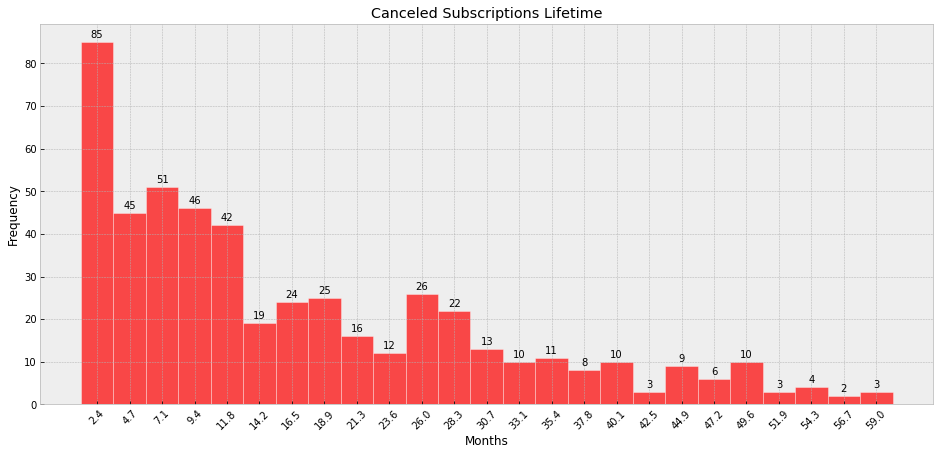

In [99]:
count, division = np.histogram(df_lifetime_subscription_days, bins=25)
ax_lifetime = df_lifetime_subscription_days.plot.hist(bins=division,figsize=(16,7),rot=45, title="Canceled Subscriptions Lifetime",edgecolor='w',color="red",alpha=0.7)
ax_lifetime.set_xlabel("Months")
# Centralizando as coordenadas dos xticks
xticks = [(division[idx+1] + value)/2 for idx, value in enumerate(division[:-1])]
# Formatando o conteúdo dos xticks
xticks_labels = [ "{:.1f}".format(value/30) for value in division[1:]]
plt.xticks(xticks, labels = xticks_labels, rotation=45)
# Adcionando o valor de cada bin sobre a barra
for idx, value in enumerate(count):
    if value > 0:
        plt.text(xticks[idx], value+1, int(value), ha='center')



In [100]:
plt.savefig('Canceled Subscriptions Lifetime.png', format='png')
plt.close()

####  Intervalo de Tempo desde a Última Compra das Assinaturas Canceladas
---

In [101]:
df_lifetime_last_order_canceled = pd.to_datetime(df_canceled_subscriptions["deleted_at"]) - pd.to_datetime(df_canceled_subscriptions["last_date_purchase"])
df_lifetime_last_order_canceled = df_lifetime_last_order_canceled.astype('timedelta64[D]').astype(int)

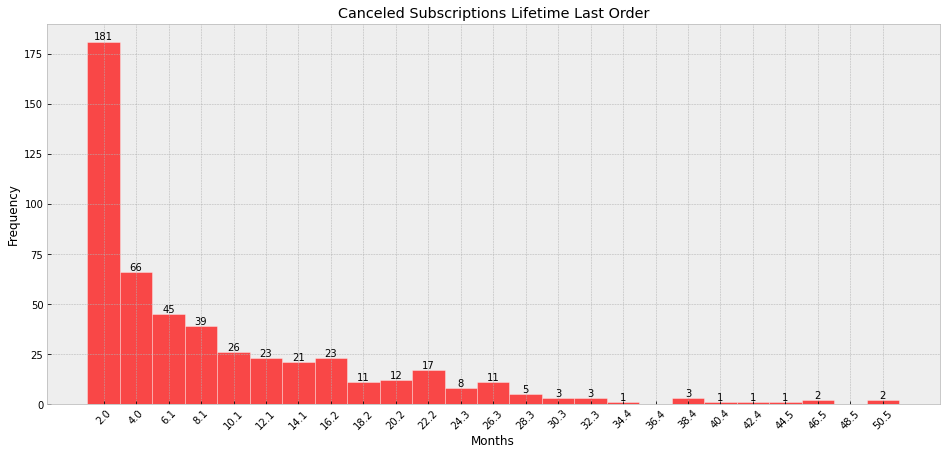

In [102]:
count, division = np.histogram(df_lifetime_last_order_canceled, bins=25)
ax_lifetime_last_order = df_lifetime_last_order_canceled.plot.hist(bins=division,figsize=(16,7),rot=45, title="Canceled Subscriptions Lifetime Last Order",color="red",edgecolor='w',alpha=0.7)
ax_lifetime_last_order.set_xlabel("Months")
# Centralizando as coordenadas dos xticks
xticks = [(division[idx+1] + value)/2 for idx, value in enumerate(division[:-1])]
# Formatando o conteúdo dos xticks
xticks_labels = [ "{:.1f}".format(value/30) for value in division[1:]]
plt.xticks(xticks, labels = xticks_labels, rotation=45)
# Adcionando o valor de cada bin sobre a barra
for idx, value in enumerate(count):
    if value > 0:
        plt.text(xticks[idx], value+1, int(value), ha='center')


In [103]:
plt.savefig('Canceled Subscriptions Lifetime Last Order.png', format='png')
plt.close()

####  Intervalo de Tempo desde a Última Compra das Assinaturas Ativas
---

In [104]:
display(df_active_subscriptions.head(3))

,id,created_at,updated_at,deleted_at,name_hash,email_hash,address_hash,birth_date,status,version,city,state,neighborhood,last_date_purchase,average_ticket,items_quantity,all_revenue,all_orders,recency,marketing_source
0,8bf7960e-3b93-468b-856e-6c6c5b56f52b,2017-08-15 07:05:04.000000,2021-01-14 11:23:50.659119,NaN,312d206168a318614897e8ccac43bff9,83eb3aed9a44377df80ce876dce92c9a,8b4bfaa0cbc41a16f46da15ddcd6a907,1974-07-10 00:00:00.000000,active,2.31.7,Peixoto da Praia,AM,Aparecida 7ª Seção,2021-01-14 11:23:50.659119,151.142942,10,906.857651,6,35,crm
1,a39535b5-4647-4680-b4f6-3aed57c1f1ff,2019-12-31 21:53:34.000000,2021-01-08 11:23:50.660183,NaN,de448fcb47d0d6a873b2eef52b5ee595,72678bb35e2ac84ed373e81dd9dca28c,22f1cfa1847f38da3f3cb114dd2b9247,1940-07-06 00:00:00.000000,paused,3.30.12,Fernandes,RR,Santa Isabel,2021-01-08 11:23:50.660183,236.991790,4,236.991790,1,41,organic_search
2,dc067cd2-c021-42bd-8c0e-beb267280e66,2019-03-07 23:46:51.000000,2021-01-07 11:23:50.660990,NaN,cb09e447ddc38283373d56bb46498e6a,668f4ee9add29c7bd02c485f1b7509e3,6cb47446a086ee6483b3eb954f11467a,1963-03-18 00:00:00.000000,active,3.28.9,Lopes,RR,Estrela,2021-01-07 11:23:50.660990,211.955597,13,2331.511572,11,42,organic_search


In [105]:
df_lifetime_last_order_actives = pd.to_datetime(date.today()) - pd.to_datetime(df_active_subscriptions["last_date_purchase"])
df_lifetime_last_order_actives = df_lifetime_last_order_actives.astype('timedelta64[D]').astype(int)

In [106]:
min(df_lifetime_last_order_actives)

371

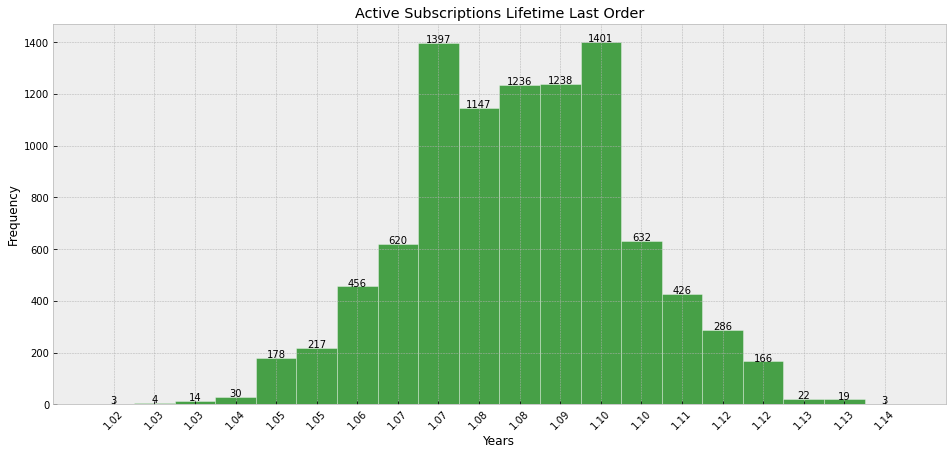

In [107]:
count, division = np.histogram(df_lifetime_last_order_actives, bins=20)
ax_lifetime_last_order = df_lifetime_last_order_actives.plot.hist(bins=division,
                                                                  figsize=(16,7),
                                                                  rot=45,
                                                                  title="Active Subscriptions Lifetime Last Order",
                                                                  color="green",
                                                                  edgecolor='w',
                                                                  alpha=0.7)
ax_lifetime_last_order.set_xlabel("Years")
# Centralizando as coordenadas dos xticks
xticks = [(division[idx+1] + value)/2 for idx, value in enumerate(division[:-1])]
# Formatando o conteúdo dos xticks
xticks_labels = [ "{:.2f}".format(value/365) for value in division[1:]]
plt.xticks(xticks, labels = xticks_labels, rotation=45)
# Adcionando o valor de cada bin sobre a barra
for idx, value in enumerate(count):
    if value > 0:
        plt.text(xticks[idx], value+1, int(value), ha='center')

In [108]:
plt.savefig('Active Subscriptions Lifetime Last Order.png', format='png')
plt.close()

####  Frequência da Média de Gasto das Assinaturas
---




In [109]:
count_active, division_active = np.histogram(df_active_subscriptions["average_ticket"], bins=20)
count_canceled, _ = np.histogram(df_canceled_subscriptions["average_ticket"], bins=division_active)


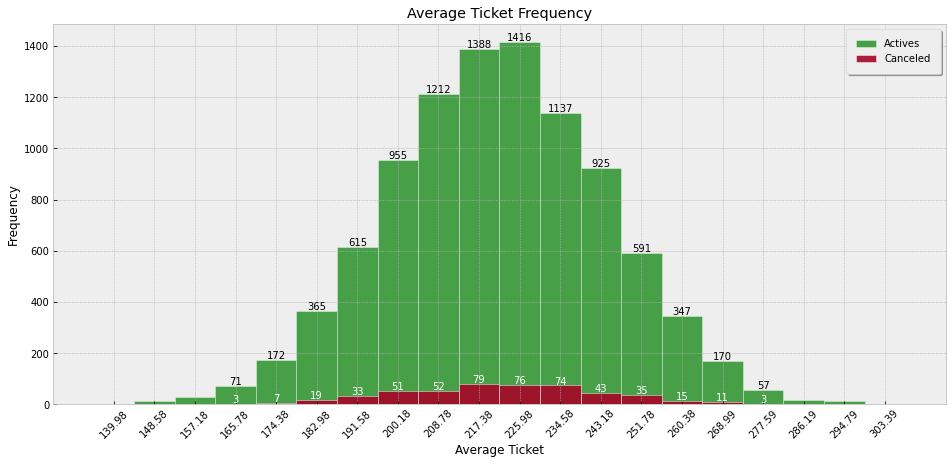

In [110]:
ax_active = df_active_subscriptions["average_ticket"].plot.hist(bins=division_active,
                                                                figsize=(16,7),
                                                                rot=45,
                                                                title="Average Ticket Frequency",
                                                                color="green",
                                                                edgecolor='w',
                                                                label="Actives",
                                                                alpha=0.7)
ax_canceled = df_canceled_subscriptions["average_ticket"].plot.hist(bins=division_active,
                                                                    rot=45,
                                                                    color="#a60628",
                                                                    edgecolor='w',
                                                                    label="Canceled",
                                                                    alpha=0.9)

ax_active.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
ax_active.set_xlabel("Average Ticket")

# Centralizando as coordenadas dos xticks
xticks = [(division_active[idx+1] + value)/2 for idx, value in enumerate(division_active[:-1])]
# Formatando o conteúdo dos xticks
xticks_labels = [ "{:.2f}".format(value) for value in division_active[1:]]
plt.xticks(xticks, labels = xticks_labels, rotation=45)
# Adcionando o valor de cada bin sobre a barra
for idx, value in enumerate(count_active):
    if value > 50:
        plt.text(xticks[idx], value+5, int(value), ha='center')
        plt.text(xticks[idx], count_canceled[idx]+5, int(count_canceled[idx]), ha='center', color="white")


In [111]:
plt.savefig('Average Ticket Frequency.png', format='png')
plt.close()

####  Frequência de Receita Assinaturas
---

In [112]:
count_active, division_active = np.histogram(df_active_subscriptions["all_revenue"], bins=20)
count_canceled, _ = np.histogram(df_canceled_subscriptions["all_revenue"], bins=division_active)

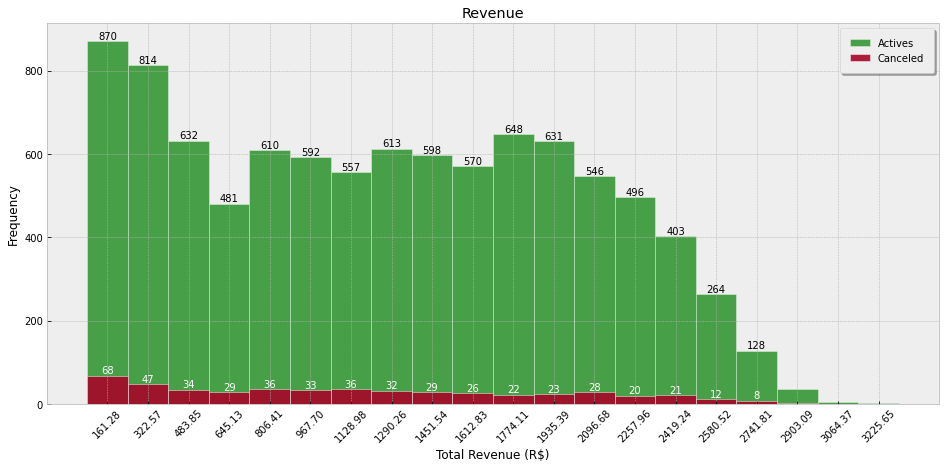

In [113]:
ax_active = df_active_subscriptions["all_revenue"].plot.hist(bins=division_active,
                                                                figsize=(16,7),
                                                                rot=45,
                                                                title="Revenue",
                                                                color="green",
                                                                edgecolor='w',
                                                                label="Actives",
                                                                alpha=0.7)
ax_canceled = df_canceled_subscriptions["all_revenue"].plot.hist(bins=division_active,
                                                                    rot=45,
                                                                    stacked=True,
                                                                    color="#a60628",
                                                                    edgecolor='w',
                                                                    label="Canceled",
                                                                    alpha=0.9)

ax_active.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
ax_active.set_xlabel("Total Revenue (R$)")

# Centralizando as coordenadas dos xticks
xticks = [(division_active[idx+1] + value)/2 for idx, value in enumerate(division_active[:-1])]
# Formatando o conteúdo dos xticks
xticks_labels = [ "{:.2f}".format(value) for value in division_active[1:]]
plt.xticks(xticks, labels = xticks_labels, rotation=45)
# Adcionando o valor de cada bin sobre a barra
for idx, value in enumerate(count_active):
    if value > 40:
        plt.text(xticks[idx], value+5, int(value), ha='center')
        plt.text(xticks[idx], count_canceled[idx]+5, int(count_canceled[idx]), ha='center', color="white")

In [114]:
plt.savefig('Revenue.png', format='png')
plt.close()

####  Versões Canceladas
---

Text(0, 0.5, 'Amount')

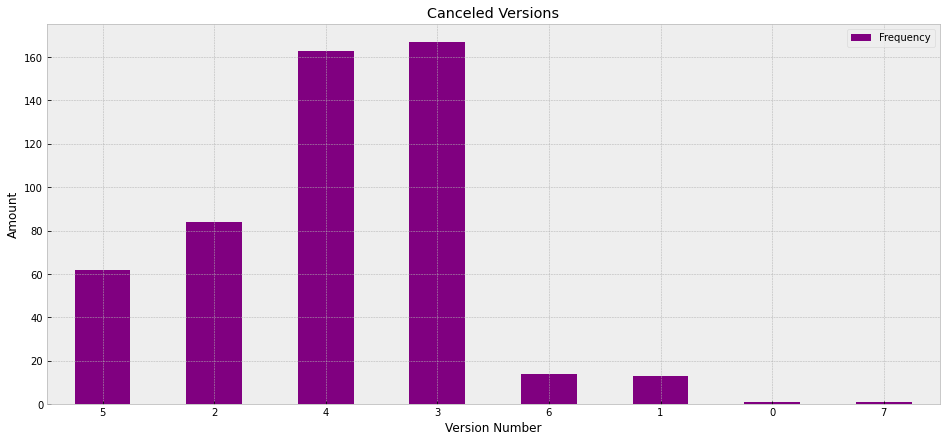

In [115]:
version_counter = Counter(df_canceled_subscriptions["version"].apply(lambda version: version[0]))
df_versions = pd.DataFrame.from_dict(version_counter, orient='index')
df_versions.columns = ["Frequency"]
ax_versions = df_versions.plot.bar(figsize=(16,7), rot=0, title="Canceled Versions",color="purple")
ax_versions.set_xlabel("Version Number")
ax_versions.set_ylabel("Amount")


In [116]:
plt.savefig('Canceled Versions.png', format='png')
plt.close()

####  Quantidade de Itens por Assinatura Cancelada
---

In [117]:
max(df_canceled_subscriptions["items_quantity"])

18

####  Quantidade de Itens por Bairro
---